## **Movie Rating Prediction with Python**

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading csv file

In [ ]:
url="/content/IMDb Movies India.csv"
df=pd.read_csv(url,encoding="latin-1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Dimensions of dataframe

In [ ]:
df.shape

(15509, 10)

### Basic Information of dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Descriptive statistics of dataframe

In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Columns of dataframe

In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

### Data types of columns

In [ ]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


### Checking null values

In [ ]:
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


### Checking Duplicate values

In [ ]:
df.duplicated().sum()

6

In [ ]:
#handling null values
df.dropna(inplace=True)

In [ ]:
#handling duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
print(df.shape)
df.head()

(5659, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
#converting into correct data types
df["Year"]=df["Year"].str.replace(r'\(|\)','',regex=True).astype(int)
df["Duration"]=pd.to_numeric(df["Duration"].str.replace("min",''))
df["Votes"]=pd.to_numeric(df["Votes"].str.replace(',',''))

In [ ]:
df.dtypes

,0
Name,object
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


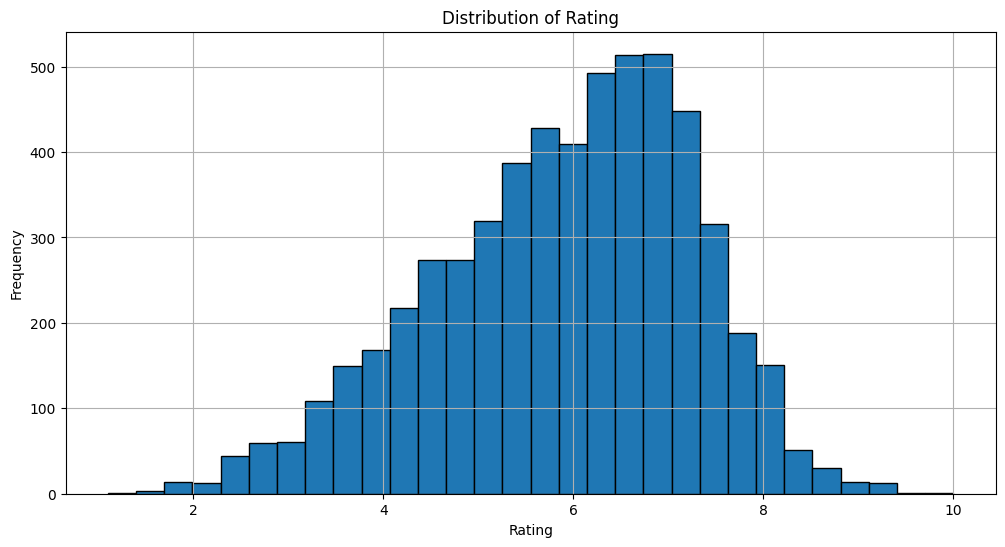

In [ ]:
#Distribution of rating
df["Rating"].hist(bins=30,edgecolor='black',figsize=(12,6))
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Rating")
plt.show()

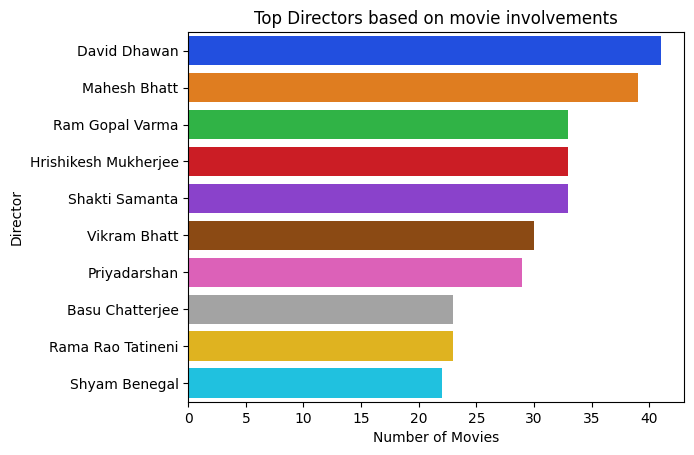

In [ ]:
#Top Directors based on movie involvements
top_directors=df["Director"].value_counts(ascending=False).head(10)
sns.barplot(x=top_directors.values,y=top_directors.index,hue=top_directors.index,palette="bright",legend=False)
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.title("Top Directors based on movie involvements")
plt.show()

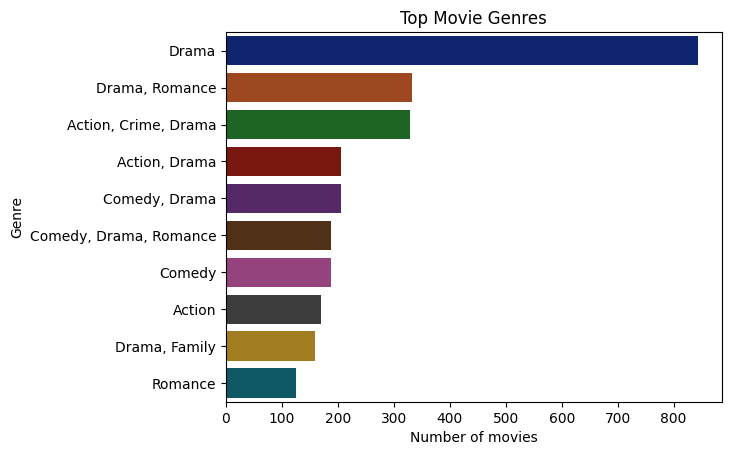

In [ ]:
#Top genres
top_genres=df["Genre"].value_counts(ascending=False).head(10)
sns.barplot(x=top_genres.values,y=top_genres.index,hue=top_genres.index,palette="dark")
plt.xlabel("Number of movies")
plt.ylabel("Genre")
plt.title("Top Movie Genres")
plt.show()

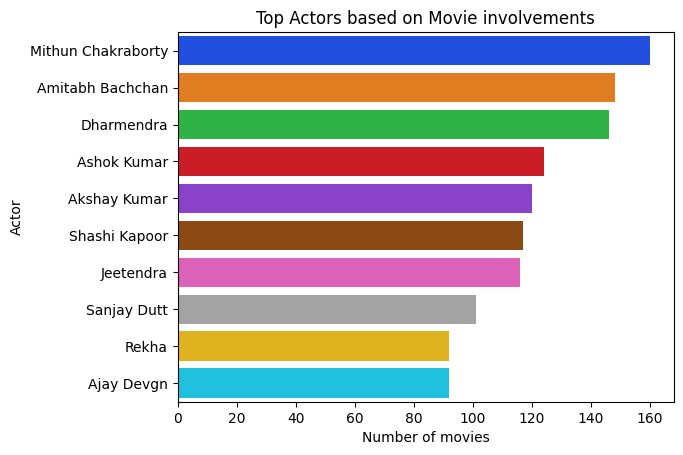

In [ ]:
#Top Actors based on movie involvements
actors=pd.concat([df["Actor 1"],df["Actor 2"],df["Actor 3"]])
top_actors=actors.value_counts().head(10)
sns.barplot(x=top_actors.values,y=top_actors.index,hue=top_actors.index,legend=False,palette="bright")
plt.xlabel("Number of movies")
plt.ylabel("Actor")
plt.title("Top Actors based on Movie involvements")
plt.show()

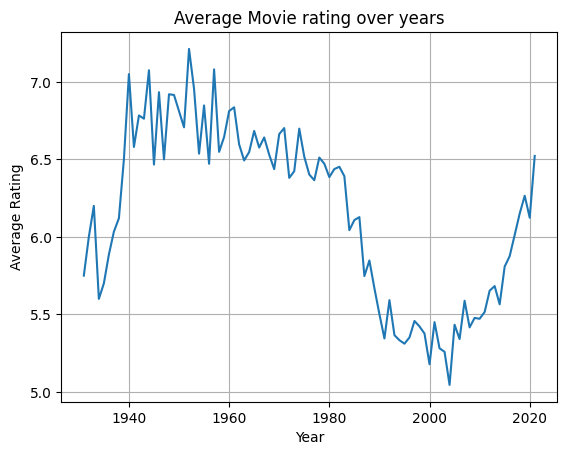

In [ ]:
#Average rating over years
avg_rating_per_year=df.groupby("Year")["Rating"].mean().reset_index()
avg_rating_per_year.columns=["Year","Average Rating"]
plt.plot(avg_rating_per_year["Year"],avg_rating_per_year["Average Rating"])
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Movie rating over years")
plt.grid()
plt.show()

In [ ]:
#High rated movies
high_rating_movies=df[df["Rating"]>8.5]
counts=high_rating_movies.groupby("Rating")["Name"].count().reset_index()
counts.columns=["Rating","Number of Movies"]
counts=counts.sort_values(by="Rating",ascending=False)
counts

,Rating,Number of Movies
10,10.0,1
9,9.7,1
8,9.4,3
7,9.3,7
6,9.2,2
5,9.1,4
4,9.0,5
3,8.9,5
2,8.8,6
1,8.7,8


<Axes: >

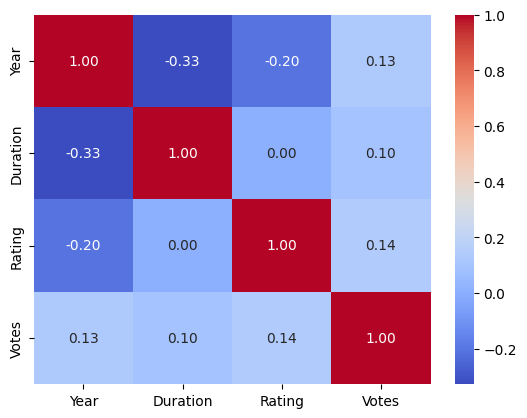

In [ ]:
#correlation
df1=df.drop(columns=["Name","Actor 1","Actor 2","Actor 3","Director","Genre"])
corr=df1.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")


In [ ]:
#creating new features
genre_avg_rating=df.groupby("Genre")["Rating"].transform("mean")
df["genre_avg_rating"]=genre_avg_rating

director_avg_rating=df.groupby("Director")["Rating"].transform("mean")
df["director_avg_rating"]=director_avg_rating

actor1_avg_rating=df.groupby("Actor 1")["Rating"].transform("mean")
df["actor1_avg_rating"]=actor1_avg_rating

actor2_avg_rating=df.groupby("Actor 2")["Rating"].transform("mean")
df["actor2_avg_rating"]=actor2_avg_rating

actor3_avg_rating=df.groupby("Actor 3")["Rating"].transform("mean")
df["actor3_avg_rating"]=actor3_avg_rating

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_avg_rating,director_avg_rating,actor1_avg_rating,actor2_avg_rating,actor3_avg_rating
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000


In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
x=df[['Year','Votes','Duration','genre_avg_rating','director_avg_rating','actor1_avg_rating','actor2_avg_rating','actor3_avg_rating']]
y=df['Rating']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
train_data=x_train.join(y_train)
train_data

,Year,Votes,Duration,genre_avg_rating,director_avg_rating,actor1_avg_rating,actor2_avg_rating,actor3_avg_rating,Rating
14357,2019,19,113,5.208333,5.375000,5.400000,5.400000,5.400000,5.4
9133,1971,17,138,5.295238,5.763636,6.000000,5.869565,6.500000,6.1
1043,1998,793,141,5.743465,5.753846,5.481707,6.060000,5.057143,5.3
6155,2004,85,127,5.588571,5.830000,6.651852,5.100000,5.000000,5.0
6645,1969,82,152,6.007229,6.237500,5.408989,6.617647,6.900000,6.9
...,...,...,...,...,...,...,...,...,...
8161,2018,7,92,5.640642,6.750000,6.600000,6.750000,6.750000,6.6
10436,1941,12,135,6.415521,6.693333,7.200000,7.200000,7.200000,7.2
3538,2014,6978,152,5.765957,7.575000,6.020000,6.614286,5.184615,7.1
10397,1981,25,137,5.611765,5.375000,6.075000,6.550000,5.593333,6.2


In [ ]:
#model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

x_train,y_train=train_data[['Year','Votes','Duration','genre_avg_rating','director_avg_rating','actor1_avg_rating','actor2_avg_rating','actor3_avg_rating']],train_data["Rating"]
#linear regression model
fit_model_lr=LinearRegression()
fit_model_lr.fit(x_train,y_train)
y_pred_lr=fit_model_lr.predict(x_test)

#Random Forest model
fit_model_rf=RandomForestRegressor()
fit_model_rf.fit(x_train,y_train)
y_pred_rf=fit_model_rf.predict(x_test)

In [ ]:
#model evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_lr=mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
r2_score_lr=r2_score(y_test,y_pred_lr)

print('Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', mse_lr)
print('Mean absolute error value is: ', mae_lr)
print('R2 score value is: ', r2_score_lr)

mse_rf=mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_score_rf = r2_score(y_test, y_pred_rf)

print('\nPerformance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', mse_rf)
print('Mean absolute error value is: ', mae_rf)
print('R2 score value is: ', r2_score_rf)

Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.44467717225109693
Mean absolute error value is:  0.4849592135885088
R2 score value is:  0.7569442434289477

Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.33153349028268553
Mean absolute error value is:  0.3965061837455833
R2 score value is:  0.8187873622984232


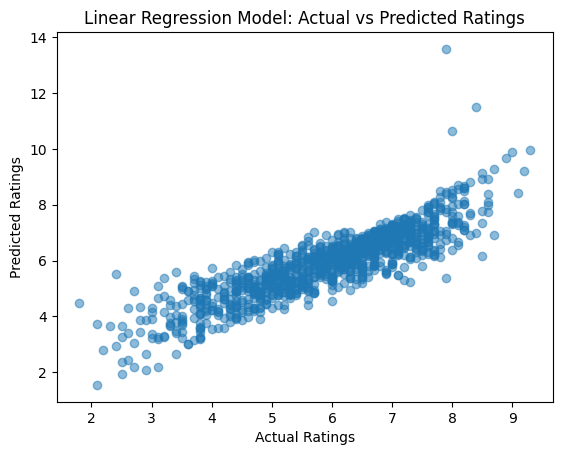

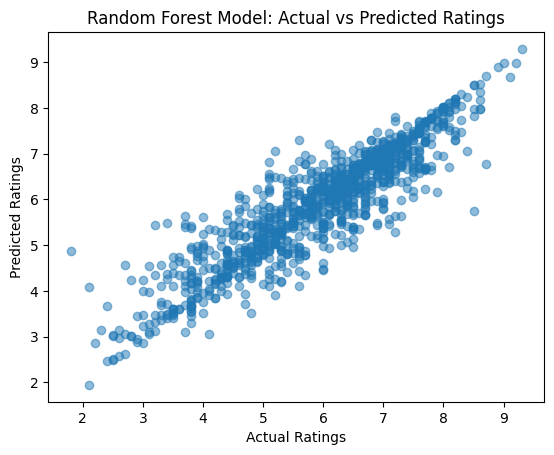

In [ ]:
#actual & predicted analysis
#scatter plot for linear regression model predictions
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.show()

# Scatter plot for Random Forest model predictions
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [ ]:
print(fit_model_lr.score(x_train,y_train))
print(fit_model_rf.score(x_train,y_train))

0.7881258010553387
0.9751768633858164


### Conclusion

In order to forecast ratings, this study used Random Forest and Linear Regression models to analyze IMDb movie data.Key themes, including top directors, actors, genres, and the distribution of ratings over time, were discovered using exploratory data analysis.  Average ratings for actors, directors, and genres were computed as part of feature engineering to improve prediction accuracy. Compared to Linear Regression, Random Forest scored better at capturing intricate patterns. The predictions were enhanced using feature engineering.